In [1]:
from collections import defaultdict
from conceptnet import ConceptNet
import utils

wrapper = ConceptNet()
huric_utils = utils.HuricUtils()
language_utils = utils.LanguageUtils('en')
graph_utils = utils.GraphUtils()

['/c/en/book', '/c/en/towel', '/c/en/mug', '/c/en/bed']
all types {'/c/en/area/n', '/c/en/creation/n', '/c/en/commercial_enterprise/n', '/c/en/product/n', '/c/en/team/n', '/c/en/chemical/n', '/c/en/quantity/n', '/c/en/consequence/n', '/c/en/group/n', '/c/en/square_mile/n', '/c/en/segment/n', '/c/en/communication/n', '/c/en/slice/n', '/c/en/musical_organization/n', '/c/en/part/n', '/c/en/section/n', '/c/en/book', '/c/en/writing/n', '/c/en/collection/n', '/c/en/work/n', '/c/en/music/n', '/c/en/army_unit/n', '/c/en/publication/n'}
all types {'/c/en/piece_of_cloth/n', '/c/en/towel', '/c/en/fabric/n'}
all types {'/c/en/containerful/n', '/c/en/indefinite_quantity/n', '/c/en/mug'}
all types {'/c/en/aspect/n', '/c/en/layer/n', '/c/en/natural_depression/n', '/c/en/plot/n', '/c/en/geological_formation/n', '/c/en/education/n', '/c/en/financial_institution/n', '/c/en/artifact/n', '/c/en/boundary/n', '/c/en/relation/n', '/c/en/foundation/n', '/c/en/bed', '/c/en/tract/n', '/c/en/subpopulation/n', '/

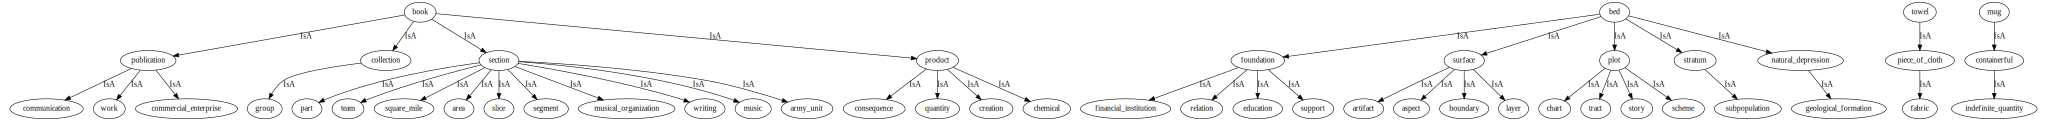

In [2]:
things = ['book', 'bath towel', 'coffee mug', 'bed']
things = [language_utils.semantic_head_lemmatize(el) for el in things]
things = [wrapper.get_id(el) for el in things]
print(things)
# follow triples [current_words], IsA, ?
all_edges = set()
for w in things:
    all_types, edges = wrapper.get_isa_tree(w)
    print('all types', all_types)
    all_edges.update(edges)

graph_utils.create_graph(all_edges, wrapper.get_name)

In [3]:
frame_elements = huric_utils.get_frame_elements_values('Theme')
frame_lemmas = set()
for el in frame_elements:
    lemma = language_utils.semantic_head_lemmatize(el)
    #print(el, ':', lemma)
    frame_lemmas.add(lemma)

folder /c/en/folder {'/c/en/protection/n', '/c/en/covering/n', '/c/en/natural_object/n', '/c/en/artifact/n', '/c/en/folder'}
tub /c/en/tub {'/c/en/indefinite_quantity/n', '/c/en/tub', '/c/en/vessel/n', '/c/en/craft/n', '/c/en/tube/n', '/c/en/containerful/n', '/c/en/container/n'}
yogurt /c/en/yogurt {'/c/en/substance/n', '/c/en/solid/n', '/c/en/yogurt', '/c/en/food/n', '/c/en/content/n'}
can /c/en/can {'/c/en/instrumentality/n', '/c/en/indefinite_quantity/n', '/c/en/reference_point/n', '/c/en/can', '/c/en/containerful/n', '/c/en/container/n', '/c/en/buoy/n'}
trash /c/en/trash {'/c/en/rabble/n', '/c/en/folk/n', '/c/en/trash'}
telephone /c/en/telephone {'/c/en/equipment/n', '/c/en/electrical_engineering/n', '/c/en/medium/n', '/c/en/telephone', '/c/en/telecommunication/n', '/c/en/electronic_equipment/n'}
table /c/en/table {'/c/en/display/n', '/c/en/arrangement/n', '/c/en/directional_antenna/n', '/c/en/clothing/n', '/c/en/array/n', '/c/en/gathering/n', '/c/en/table', '/c/en/social_group/n'}

pan /c/en/pan {'/c/en/instrumentality/n', '/c/en/cooking_utensil/n', '/c/en/kitchen_utensil/n', '/c/en/pan', '/c/en/genus/n', '/c/en/container/n', '/c/en/mammal_genus/n'}
reading /c/en/reading {'/c/en/information/n', '/c/en/interpretation/n', '/c/en/human_process/n', '/c/en/activity/n', '/c/en/representation/n', '/c/en/measurement/n', '/c/en/datum/n', '/c/en/linguistic_process/n', '/c/en/reading', '/c/en/explanation/n', '/c/en/higher_cognitive_process/n', '/c/en/communication/n', '/c/en/written_communication/n'}
bottle /c/en/bottle {'/c/en/indefinite_quantity/n', '/c/en/vessel/n', '/c/en/bottle', '/c/en/craft/n', '/c/en/tube/n', '/c/en/containerful/n', '/c/en/container/n'}
bin /c/en/bin {'/c/en/instrumentality/n', '/c/en/bin', '/c/en/indefinite_quantity/n', '/c/en/containerful/n', '/c/en/container/n'}
postcard /c/en/postcard {'/c/en/postcard'}
cushion /c/en/cushion {'/c/en/structure/n', '/c/en/layer/n', '/c/en/cushion', '/c/en/hen/n', '/c/en/padding/n', '/c/en/region/n', '/c/en/artifac

coke /c/en/coke {'/c/en/substance/n', '/c/en/hard_drug/n', '/c/en/fuel/n', '/c/en/coke', '/c/en/cocaine/n'}
cereal /c/en/cereal {'/c/en/gramineous_plant/n', '/c/en/grass/n', '/c/en/cereal'}


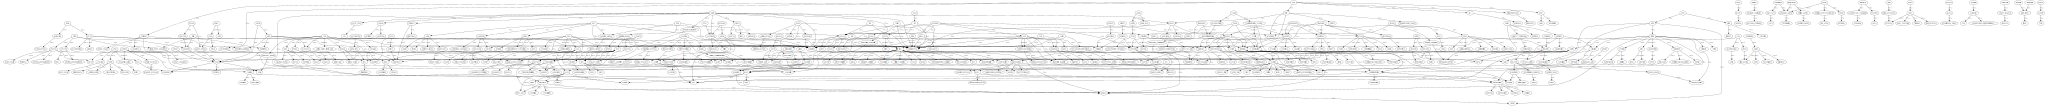

In [4]:
all_hypernyms = defaultdict(lambda: 0)
all_edges = set()
for w in frame_lemmas:
    id = wrapper.get_id(w)
    hypernyms, edges = wrapper.get_isa_tree(id)
    print(w, id, hypernyms)
    for w in hypernyms:
        all_hypernyms[w] += 1
    all_edges.update(edges)

graph_utils.create_graph(all_edges, wrapper.get_name)

In [5]:
sorted_hypernyms = sorted([(k,v) for k,v in all_hypernyms.items()], key=lambda el: el[1], reverse=True)
print(sorted_hypernyms)

[('/c/en/container/n', 18), ('/c/en/containerful/n', 16), ('/c/en/indefinite_quantity/n', 14), ('/c/en/instrumentality/n', 10), ('/c/en/artifact/n', 8), ('/c/en/food/n', 6), ('/c/en/covering/n', 5), ('/c/en/vessel/n', 5), ('/c/en/substance/n', 5), ('/c/en/solid/n', 5), ('/c/en/communication/n', 5), ('/c/en/act/n', 5), ('/c/en/craft/n', 4), ('/c/en/tube/n', 4), ('/c/en/medium/n', 4), ('/c/en/consequence/n', 4), ('/c/en/part/n', 4), ('/c/en/layer/n', 4), ('/c/en/tableware/n', 4), ('/c/en/natural_object/n', 3), ('/c/en/content/n', 3), ('/c/en/clothing/n', 3), ('/c/en/line/n', 3), ('/c/en/fabric/n', 3), ('/c/en/creation/n', 3), ('/c/en/product/n', 3), ('/c/en/chemical/n', 3), ('/c/en/quantity/n', 3), ('/c/en/machine/n', 3), ('/c/en/material/n', 3), ('/c/en/receptacle/n', 3), ('/c/en/activity/n', 3), ('/c/en/plant_part/n', 3), ('/c/en/fitting/n', 3), ('/c/en/cleansing_agent/n', 3), ('/c/en/formulation/n', 3), ('/c/en/plot/n', 3), ('/c/en/abstraction/n', 3), ('/c/en/work/n', 3), ('/c/en/food